In [230]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [231]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt
from pathlib import Path
from helpers import (
    filter_region_year,
    REGIJE_FILTER,
    REGION_COLORS
)
import seaborn as sns
from scipy.stats import ttest_ind, shapiro
import matplotlib.colors as mcolors
import matplotlib.cm as cm


In [232]:
NEVARNE_SNOVI = ["SO2", "PM10", "NO2"]
WIDE_PATH = Path("podatki/wide_df.csv")

locale.setlocale(locale.LC_ALL, "sl_SI.utf8")

df = pd.read_csv(WIDE_PATH, parse_dates=["Datum"])


In [233]:
def plot_average_value_changes(stats_df: pd.DataFrame, pollutant: str):
    """
    Visualizes the change in average pollutant value for each region before and after the directive.

    Args:
        stats_df (pd.DataFrame): DataFrame returned by calculate_stats,
                                    containing statistics with 'Regija' and 'Povprečna vrednost' columns.
        pollutant (str): The name of the pollutant being analyzed.
    """
    diff_vals = 100 * (stats_df["povprečje [po]"] - stats_df["povprečje [pred]"]) / stats_df['povprečje [pred]']
    diff_df = pd.DataFrame(
        data=diff_vals, index=stats_df.index, columns=["Razlika"]
    ).reset_index()

    norm = mcolors.TwoSlopeNorm(vmin=-100, vcenter=0, vmax=100)
    cmap = mcolors.LinearSegmentedColormap.from_list(
        "custom_div", ["green", "white", "red"]
    )
    colors = [cmap(norm(val)) for val in diff_df["Razlika"]]
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot
    sns.barplot(
        x="Razlika",
        y="Regija",
        data=diff_df,
        hue="Regija",
        palette=colors,
        legend=False,
    )

    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    ax.set_xlim(-100, 100)

    # Add value labels
    for i, row in diff_df.iterrows():
        ax.text(
            row["Razlika"] if row["Razlika"] < 0 else row["Razlika"] + 1.5,
            i,
            f'{row["Razlika"]:.1f}%',
            color="black",
            ha="right" if row["Razlika"] < 0 else "left",
            va="center",
        )

    ax.set_title(f"Odstotek spremembe za {pollutant}")
    ax.set_xlabel("Sprememba (%)")
    ax.set_ylabel("Regija")

    plt.tight_layout()
    plt.savefig(f"grafi/razlika_{pollutant}.png")
    plt.show()

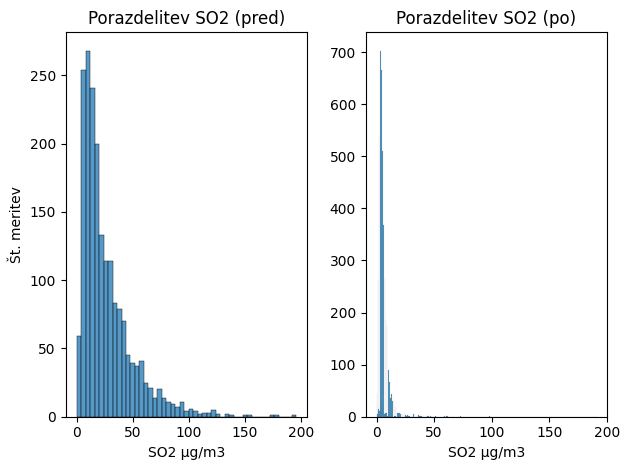

,n [pred],n [po],povprečje [pred],povprečje [po],mediana [pred],mediana [po],std [pred],std [po]
Regija,,,,,,,,
Koroška,96.0,227.0,22.479167,3.854626,16.5,4.0,17.307120,2.004776
Osrednjeslovenska,264.0,554.0,17.496212,3.797834,13.5,3.0,12.898256,2.341889
Posavska,124.0,300.0,35.774194,7.502333,30.5,5.0,23.494624,8.905890
Savinjska,801.0,1934.0,22.766542,4.929835,16.0,4.0,20.759135,4.135365
Zasavska,661.0,1245.0,32.633888,6.967309,23.0,5.2,27.999334,8.253277
Slovenija,1946.0,4260.0,26.217883,5.501948,18.0,4.0,23.474250,5.977609


,Regija,Mann-Whitney U,p-vrednost
0,Savinjska,1393349.5,< 0.001***
1,Zasavska,739371.0,< 0.001***
4,Osrednjeslovenska,136020.0,< 0.001***
2,Posavska,34504.5,< 0.001***
3,Koroška,21051.0,< 0.001***


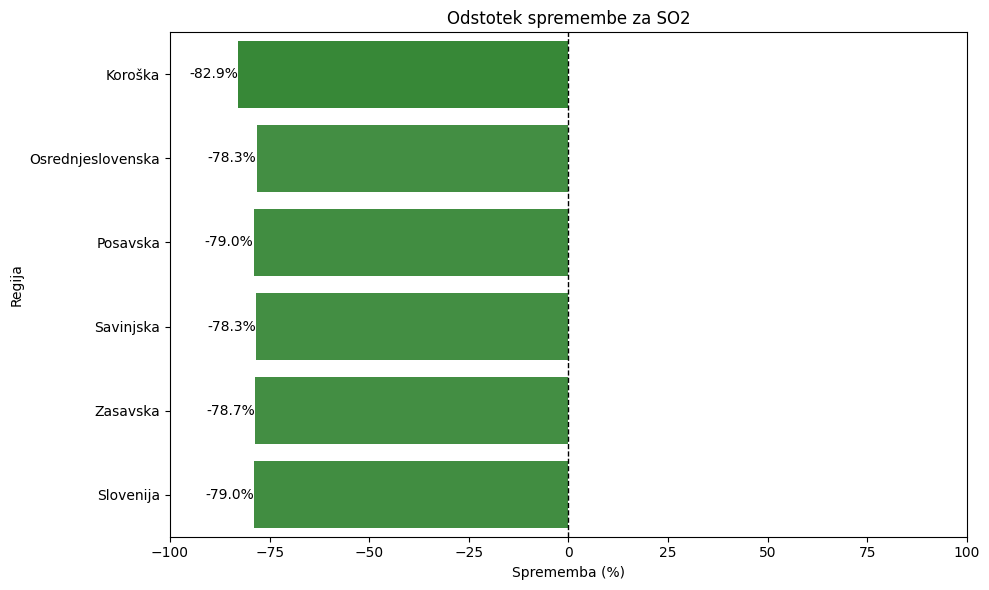

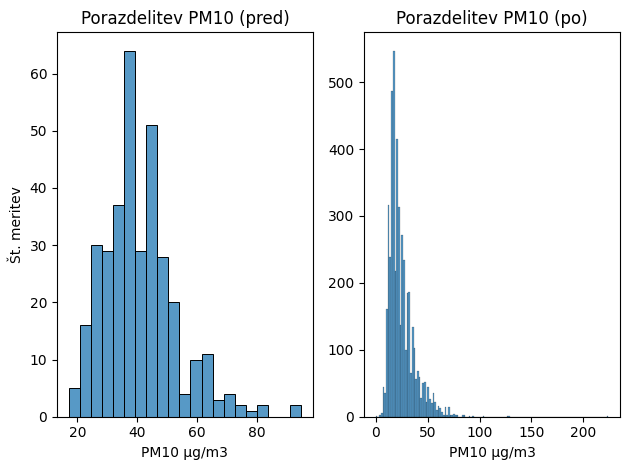

,n [pred],n [po],povprečje [pred],povprečje [po],mediana [pred],mediana [po],std [pred],std [po]
Regija,,,,,,,,
Goriška,36.0,653.0,36.805556,21.076570,36.0,19.0,5.137089,8.612853
Osrednjeslovenska,36.0,940.0,42.916667,27.009574,41.0,23.0,9.219157,14.466329
Podravska,60.0,807.0,46.800000,24.285006,45.0,21.0,12.034977,11.285295
Pomurska,36.0,300.0,38.111111,26.980000,36.5,24.0,9.759326,12.585212
Posavska,24.0,227.0,27.916667,22.189427,26.0,20.0,6.337718,9.680483
Savinjska,72.0,971.0,37.013889,23.333677,36.0,19.0,13.845722,12.585784
Zasavska,84.0,894.0,44.797619,26.790828,43.0,23.0,12.893241,14.521633
Slovenija,348.0,4792.0,40.655172,24.726419,39.0,21.0,12.430396,12.763281


,Regija,Mann-Whitney U,p-vrednost
2,Podravska,44634.5,< 0.001***
5,Zasavska,63361.0,< 0.001***
0,Savinjska,56526.0,< 0.001***
4,Goriška,21853.0,< 0.001***
1,Osrednjeslovenska,29360.0,< 0.001***
3,Pomurska,8447.5,< 0.001***
6,Posavska,4219.5,< 0.001***


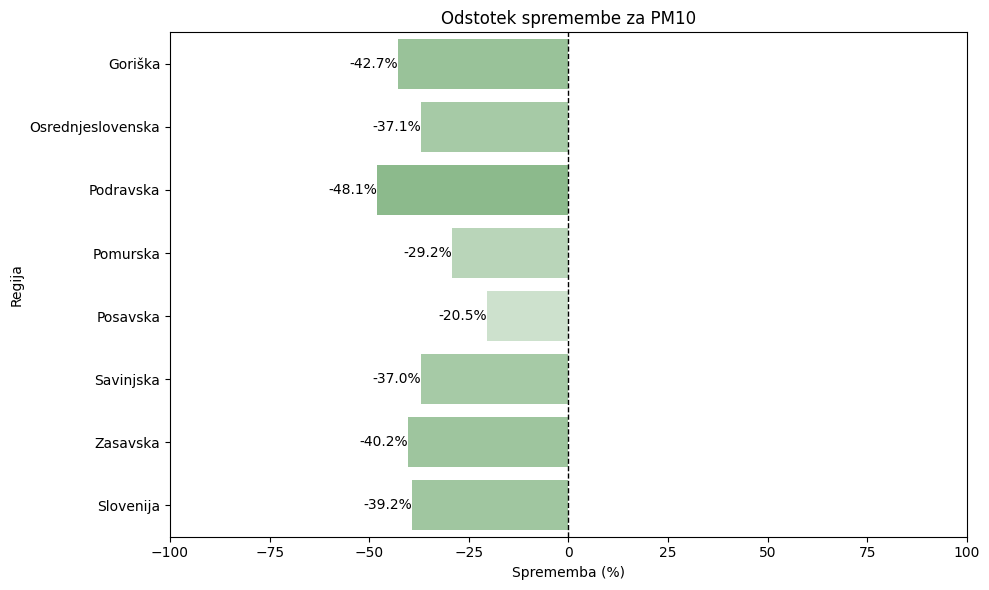

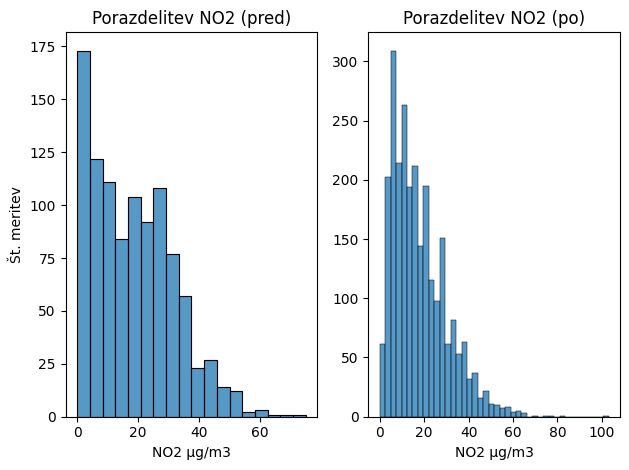

,n [pred],n [po],povprečje [pred],povprečje [po],mediana [pred],mediana [po],std [pred],std [po]
Regija,,,,,,,,
Goriška,96.0,180.0,26.125000,23.516667,25.0,22.0,7.503333,9.016729
Osrednjeslovenska,203.0,506.0,19.546798,28.037549,19.0,27.0,16.512567,15.982558
Podravska,96.0,339.0,35.041667,21.038348,34.0,21.0,7.446535,10.761605
Pomurska,96.0,155.0,14.541667,13.251613,13.0,12.0,5.015590,5.666710
Savinjska,333.0,883.0,12.957958,12.266138,8.0,9.0,12.109368,9.299042
Zasavska,188.0,514.0,17.382979,15.005837,17.0,14.0,9.206608,8.446712
Slovenija,1012.0,2577.0,18.595850,17.908421,17.0,15.0,13.218386,12.417592


,Regija,Mann-Whitney U,p-vrednost
3,Podravska,27842.5,< 0.001***
2,Osrednjeslovenska,34779.0,< 0.001***
1,Zasavska,54948.5,0.00528**
5,Goriška,10362.0,0.00637**
4,Pomurska,8549.0,0.047*
0,Savinjska,137156.0,0.0705


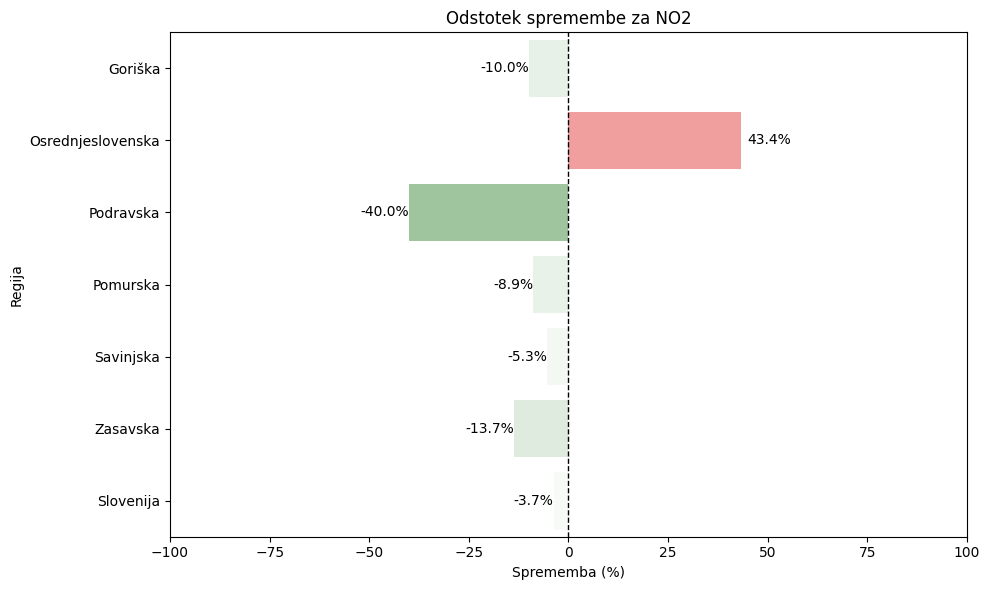

In [ ]:
from scipy.stats import mannwhitneyu, kstest


def split_directive(df: pd.DataFrame):
    leto = pd.to_datetime(REGIJE_FILTER[df.columns.to_list()[-1]]["direktiva"])
    pre_ind = df["Datum"] < leto
    return df[pre_ind], df[~pre_ind]


def get_significance(p):
    return "*" * sum(p < t for t in [0.05, 0.01, 0.001])


def format_p(p):
    return "< 0.001***" if p < 0.001 else f"{p:.3g}{get_significance(p)}"


def calculate_stats(df: pd.DataFrame, snov):
    """Calculates basic statistics for each region in the given df"""
    pre, post = split_directive(df)

    def aggregate_stats(pre: pd.DataFrame, post: pd.DataFrame) -> pd.DataFrame:
        pre_grouped = pre.groupby("Regija")[snov].agg(
            n="count", povprečje="mean", mediana="median", std="std"
        )
        post_grouped = post.groupby("Regija")[snov].agg(
            n="count", povprečje="mean", mediana="median", std="std"
        )
        combined = pre_grouped.join(post_grouped, rsuffix=" [po]", lsuffix=" [pred]")

        ordered_columns = [
            "n [pred]",
            "n [po]",
            "povprečje [pred]",
            "povprečje [po]",
            "mediana [pred]",
            "mediana [po]",
            "std [pred]",
            "std [po]",
        ]
        combined = combined[ordered_columns]
        return combined

    basic_stats = aggregate_stats(pre, post)

    fig, axes = plt.subplots(1, 2)

    sns.histplot(pre[snov], ax=axes[0])
    axes[0].set_ylabel("Št. meritev")
    axes[0].set_xlabel(f"{snov} µg/m3")
    axes[0].set_title(f"Porazdelitev {snov} (pred)")

    sns.histplot(post[snov], ax=axes[1])
    axes[1].set_xlabel(f"{snov} µg/m3")
    axes[1].set_ylabel("")
    axes[1].set_title(f"Porazdelitev {snov} (po)")

    plt.tight_layout()
    plt.savefig(f"grafi/porazdelitev_{snov}.png")
    plt.show()

    basic_stats.sort_index(inplace=True)
    basic_stats.loc["Slovenija"] = [
        pre[snov].size,
        post[snov].size,
        pre[snov].mean(),
        post[snov].mean(),
        pre[snov].median(),
        post[snov].median(),
        pre[snov].std(),
        post[snov].std(),
    ]

    return basic_stats


def perform_stat_tests(df: pd.DataFrame, direktiva: str, snov: str):
    pre_ind = df["Datum"] < pd.to_datetime(direktiva)
    pre = df[pre_ind].copy()
    post = df[~pre_ind].copy()

    results = []
    kstesti = {}

    for region in df["Regija"].unique():
        pre_vals = pre.loc[pre["Regija"] == region, snov].dropna()
        post_vals = post.loc[post["Regija"] == region, snov].dropna()

        kstesti[region] = kstest(pre_vals, post_vals)

        test_stat, p_value = mannwhitneyu(pre_vals, post_vals, alternative="two-sided")

        results.append(
            {
                "Regija": region,
                "Mann-Whitney U": test_stat,
                "p-vrednost": p_value,
            }
        )

    kstesti_df = (
        pd.DataFrame(kstesti)
        .transpose()
        .set_axis(["KS vrednost", "p-vrednost"], axis=1)
    )
    kstesti_df.sort_values(by="p-vrednost")
    total_ks, total_p = kstest(pre[snov], post[snov])
    kstesti_df.loc["Slovenija"] = [total_ks, total_p]
    kstesti_df["p-vrednost"] = kstesti_df["p-vrednost"].apply(format_p)

    results_df = pd.DataFrame(results).sort_values(by="p-vrednost")

    results_df["p-vrednost"] = results_df["p-vrednost"].apply(format_p)
    return results_df, kstesti_df


for i, snov in enumerate(NEVARNE_SNOVI):
    direktiva = REGIJE_FILTER[snov]["direktiva"]
    filtered_df = filter_region_year(df, snov).dropna()

    basic_stats = calculate_stats(filtered_df, snov)
    display(basic_stats)

    mann_tests, ks_tests = perform_stat_tests(filtered_df, direktiva, snov)
    display(mann_tests)
    break
    